In [ ]:
import pandas as pd

In [ ]:
pip install tensorflow

In [ ]:
# import packages
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
# For Hidden layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_test.shape

(10000,)

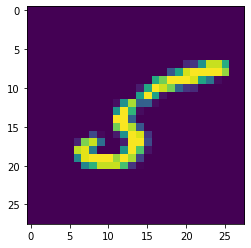

In [ ]:
# plotting the image
plt.imshow(X_train[11])
plt.show()

In [ ]:
X_train[50]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12,  56, 140,
        126, 175, 200,  96,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  35, 166, 238, 254, 246,
        242, 253, 246, 254,  67,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
# flattening of our matrix to a vector of input shape 784
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])

In [ ]:
# Flattening our test data
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
y_train[5]

2

In [ ]:
#Convrting in in to an one-hot encoding form
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
# Normalization of the X_train and X_test 
# Now Pixel intensity value will change from 0-255 to 0-1
X_train = X_train/255
X_test = X_test/255

In [ ]:
# Defining the type of model - To go through Layers sequentially
model = Sequential()

In [ ]:
#  1st Hidden layer alongside input
model.add(Dense(64,activation='relu',input_shape = (784,)))
# 2nd Hidden layer
model.add(Dense(32, activation = 'relu'))
# Output layer
model.add(Dense(10,activation = 'softmax'))

In [ ]:
# Output layer without hidden layer
# model.add(Dense(10,activation='softmax',input_shape = (784,)))

In [ ]:
#Getting the Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model by giving the loss function and the type of optimizer you need
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,batch_size = 200, epochs =10)

Epoch 1/10
300/300 [==============================] - 2s 4ms/step - loss: 0.9405 - accuracy: 0.7280
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2260 - accuracy: 0.9363
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1666 - accuracy: 0.9525
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1314 - accuracy: 0.9616
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1101 - accuracy: 0.9687
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0901 - accuracy: 0.9728
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0799 - accuracy: 0.9757
Epoch 8/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0723 - accuracy: 0.9779
Epoch 9/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0591 - accuracy: 0.9827
Epoch 10/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0546 - accuracy: 0.9839

In [ ]:
# Evaluating the value of the model
score = model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0931 - accuracy: 0.9710


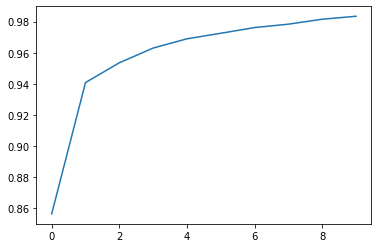

In [ ]:
#Plotting the accuracy - Increasing with Epochs
plt.plot(history.history['accuracy'])
plt.show()

In [ ]:
# Prediciting the values
predicted_values = model.predict(X_test[:10])
# print(predicted_values)
print(np.argmax(predicted_values,axis = 1))

[7 2 1 0 4 1 4 9 5 9]


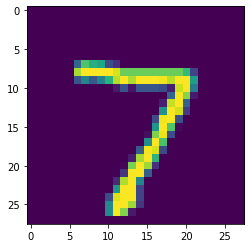

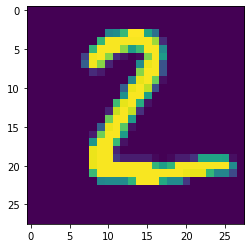

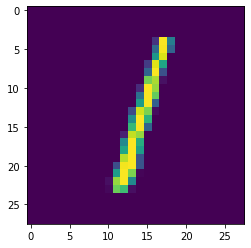

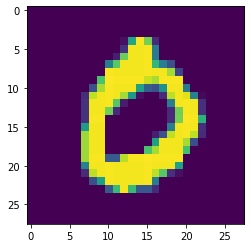

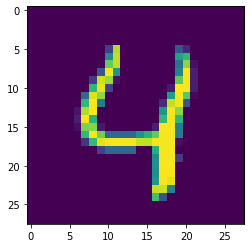

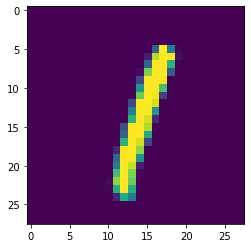

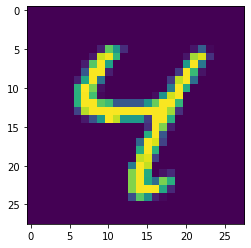

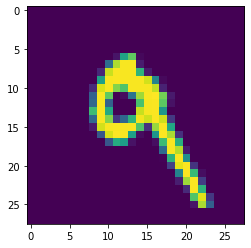

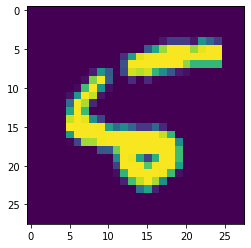

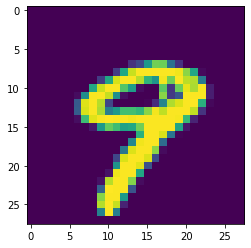

In [ ]:
for i in range(0,10):
  image = X_test[i]
  image = np.array(image, dtype = 'float')
  pixels = image.reshape((28,28))
  plt.imshow(pixels)
  plt.show()